# Concreate strength from UCI machine learning repository
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.preprocessing as sp
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data6 = pd.read_csv("6_Concrete_Slump_test/slump_test.data.txt")
# data10 = pd.read_csv("10_Akabane/akabane.csv")
%matplotlib inline
df = data6[["Cement", "Slag", "Fly ash", "SP", "Coarse Aggr.", "Fine Aggr.", "Fine Aggr.", "Compressive Strength (28-day)(Mpa)"]]

In [5]:
data6

No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0      1   273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1      2   163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2      3   162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3      4   162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4      5   154.0  112.0    144.0  220.0  10.0         923.0       658.0   
5      6   147.0   89.0    115.0  202.0   9.0         860.0       829.0   
6      7   152.0  139.0    178.0  168.0  18.0         944.0       695.0   
7      8   145.0    0.0    227.0  240.0   6.0         750.0       853.0   
8      9   152.0    0.0    237.0  204.0   6.0         785.0       892.0   
9     10   304.0    0.0    140.0  214.0   6.0         895.0       722.0   
10    11   145.0  106.0    136.0  208.0  10.0         751.0       883.0   
11    12   148.0  109.0    139.0  193.0   7.0         768.0       902.0   
12    13   142.0  130.0    167.0  215.0   6.0         735.0       836.0   
13    14   354.0    0.0      0.0  234.0   6.0         959.0       691.0   
14    15   374.0    0.0      0.0  190.0   7.0        1013.0       730.0   
15    16   159.0  116.0    149.0  175.0  15.0         953.0       720.0   
16    17   153.0    0.0    239.0  200.0   6.0        1002.0       684.0   
17    18   295.0  106.0    136.0  206.0  11.0         750.0       766.0   
18    19   310.0    0.0    143.0  168.0  10.0         914.0       804.0   
19    20   296.0   97.0      0.0  219.0   9.0         932.0       685.0   
20    21   305.0  100.0      0.0  196.0  10.0         959.0       705.0   
21    22   310.0    0.0    143.0  218.0  10.0         787.0       804.0   
22    23   148.0  180.0      0.0  183.0  11.0         972.0       757.0   
23    24   146.0  178.0      0.0  192.0  11.0         961.0       749.0   
24    25   142.0  130.0    167.0  174.0  11.0         883.0       785.0   
25    26   140.0  128.0    164.0  183.0  12.0         871.0       775.0   
26    27   308.0  111.0    142.0  217.0  10.0         783.0       686.0   
27    28   295.0  106.0    136.0  208.0   6.0         871.0       650.0   
28    29   298.0  107.0    137.0  201.0   6.0         878.0       655.0   
29    30   314.0    0.0    161.0  207.0   6.0         851.0       757.0   
..   ...     ...    ...      ...    ...   ...           ...         ...   
73    74   294.0  106.0    136.0  207.0   6.0         747.0       778.0   
74    75   146.0  106.0    137.0  209.0   6.0         875.0       765.0   
75    76   149.0  109.0    139.0  193.0   6.0         892.0       780.0   
76    77   159.0    0.0    187.0  176.0  11.0         990.0       789.0   
77    78   261.0   78.0    100.0  201.0   9.0         864.0       761.0   
78    79   140.0    1.4    198.1  174.9   4.4        1049.9       780.5   
79    80   141.1    0.6    209.5  188.8   4.6         996.1       789.2   
80    81   140.1    4.2    215.9  193.9   4.7        1049.5       710.1   
81    82   140.1   11.8    226.1  207.8   4.9        1020.9       683.8   
82    83   160.2    0.3    240.0  233.5   9.2         781.0       841.1   
83    84   140.2   30.5    239.0  169.4   5.3        1028.4       742.7   
84    85   140.2   44.8    234.9  171.3   5.5        1047.6       704.0   
85    86   140.5   61.1    238.9  182.5   5.7        1017.7       681.4   
86    87   143.3   91.8    239.8  200.8   6.2         964.8       647.1   
87    88   194.3    0.3    240.0  234.2   8.9         780.6       811.3   
88    89   150.4  110.9    239.7  168.1   6.5        1000.2       667.2   
89    90   150.3  111.4    238.8  167.3   6.5         999.5       670.5   
90    91   155.4  122.1    240.0  179.9   6.7         966.8       652.5   
91    92   165.3  143.2    238.3  200.4   7.1         883.2       652.6   
92    93   303.8    0.2    239.8  236.4   8.3         780.1       715.3   
93    94   172.0  162.1    238.5  166.0   7.4         953.3       641.4   
94    95   172.8  158.3    239.

In [6]:
for_moltiple_data = data6.drop(["No", "SLUMP(cm)", "FLOW(cm)"], axis=1)

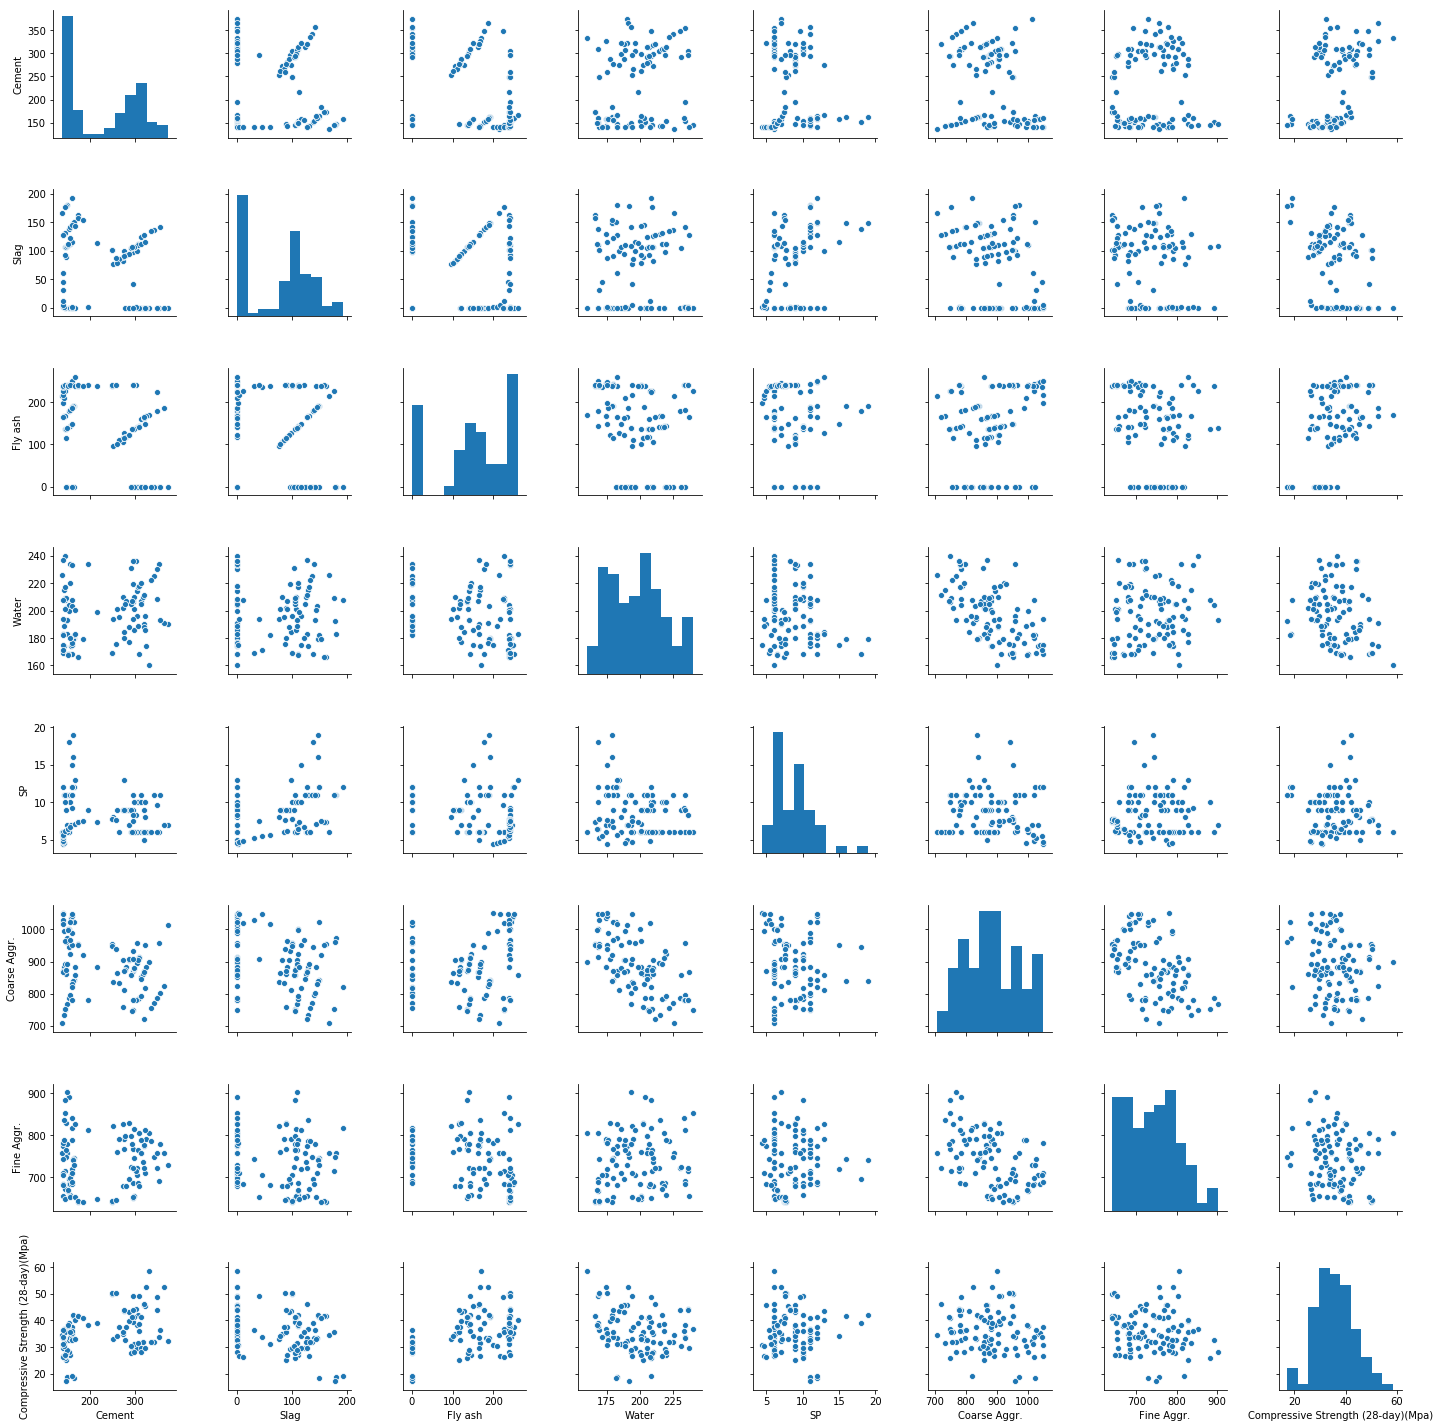

In [7]:
sns.pairplot(for_moltiple_data)
plt.show()

In [8]:
X = for_moltiple_data.iloc[:, :-1]
y = for_moltiple_data.iloc[:, -1]
X.corr()

Cement      Slag   Fly ash     Water        SP  Coarse Aggr.  \
Cement        1.000000 -0.243553 -0.486535  0.221091 -0.106387     -0.309857   
Slag         -0.243553  1.000000 -0.322619 -0.026775  0.306504     -0.223792   
Fly ash      -0.486535 -0.322619  1.000000 -0.241321 -0.143508      0.172620   
Water         0.221091 -0.026775 -0.241321  1.000000 -0.155456     -0.602201   
SP           -0.106387  0.306504 -0.143508 -0.155456  1.000000     -0.104159   
Coarse Aggr. -0.309857 -0.223792  0.172620 -0.602201 -0.104159      1.000000   
Fine Aggr.    0.056959 -0.183522 -0.282854  0.114591  0.058290     -0.488537   

              Fine Aggr.  
Cement          0.056959  
Slag           -0.183522  
Fly ash        -0.282854  
Water           0.114591  
SP              0.058290  
Coarse Aggr.   -0.488537  
Fine Aggr.      1.000000

In [9]:

model = sm.OLS(y, sm.add_constant(X))

# ラベル名を用いるときのモデルの設定 Construct a linear regression model
#model = smf.ols(formula = "damage ~ distance", data = data)

# 回帰分析の実行 Execute linear  regression 
results = model.fit()

# 結果を表示　Print results
print(results.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Compressive Strength (28-day)(Mpa)   R-squared:                       0.897
Model:                                            OLS   Adj. R-squared:                  0.889
Method:                                 Least Squares   F-statistic:                     118.0
Date:                                Mon, 24 Dec 2018   Prob (F-statistic):           5.44e-44
Time:                                        17:39:05   Log-Likelihood:                -240.75
No. Observations:                                 103   AIC:                             497.5
Df Residuals:                                      95   BIC:                             518.6
Df Model:                                           7                                         
Covariance Type:                            nonrobust                                         
                   coef    std err          t     

In [10]:
X_scale = sp.scale(X)
y_scale = sp.scale(y)

# モデルの設定
mod = sm.OLS(y_scale, sm.add_constant(X_scale))

# 回帰分析の実行
res = mod.fit()

# 結果を表示
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           5.44e-44
Time:                        17:39:05   Log-Likelihood:                -29.171
No. Observations:                 103   AIC:                             74.34
Df Residuals:                      95   BIC:                             95.42
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.033  -8.42e-15      1.0

In [11]:
def step_aic(model, exog, endog, **kwargs):
    """
    This select the best exogenous variables with AIC
    Both exog and endog values can be either str or list.
    (Endog list is for the Binomial family.)

    Note: This adopt only "forward" selection

    Args:
        model: model from statsmodels.formula.api
        exog (str or list): exogenous variables
        endog (str or list): endogenous variables
        kwargs: extra keyword argments for model (e.g., data, family)

    Returns:
        model: a model that seems to have the smallest AIC
    """

    # exog, endogは強制的にリスト形式に変換しておく
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # 採用が確定された要因

    # 定数項のみのAICを計算
    formula_head = ' + '.join(endog) + ' ~ '
    formula = formula_head + '1'
    aic = model(formula=formula, **kwargs).fit().aic
    print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

    current_score, best_new_score = np.ones(2) * aic

    # 全要因を採択するか，どの要因を追加してもAICが上がらなければ終了
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:

            # 残っている要因を1つずつ追加したときのAICを計算
            formula_tail = ' + '.join(selected + [candidate])
            formula = formula_head + formula_tail
            aic = model(formula=formula, **kwargs).fit().aic
            print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

            scores_with_candidates.append((aic, candidate))

        # 最もAICが小さかった要因をbest_candidateとする
        scores_with_candidates.sort()
        scores_with_candidates.reverse()
        best_new_score, best_candidate = scores_with_candidates.pop()

        # 候補要因追加でAICが下がったならば，それを確定要因として追加する
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    formula = formula_head + ' + '.join(selected)
    print('The best formula: {}'.format(formula))
    return model(formula, **kwargs).fit()

In [33]:
df_scale_x = pd.DataFrame(X_scale, columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7"])
df_scale_y = pd.DataFrame(y_scale, columns=["y"])
df_scale = pd.concat([df_scale_x, df_scale_y], axis=1)

In [13]:
model = step_aic(smf.ols, ["x1", "x2", "x3", "x4", "x5", "x6", "x7"], ["y"], data=df_scale)

AIC: 294.301, formula: y ~ 1
AIC: 293.607, formula: y ~ x6
AIC: 273.641, formula: y ~ x3
AIC: 293.813, formula: y ~ x7
AIC: 296.154, formula: y ~ x5
AIC: 284.304, formula: y ~ x2
AIC: 273.489, formula: y ~ x1
AIC: 289.419, formula: y ~ x4
AIC: 275.416, formula: y ~ x1 + x6
AIC: 146.236, formula: y ~ x1 + x3
AIC: 271.23, formula: y ~ x1 + x7
AIC: 275.477, formula: y ~ x1 + x5
AIC: 268.457, formula: y ~ x1 + x2
AIC: 257.126, formula: y ~ x1 + x4
AIC: 147.372, formula: y ~ x1 + x3 + x6
AIC: 147.394, formula: y ~ x1 + x3 + x7
AIC: 131.627, formula: y ~ x1 + x3 + x5
AIC: 130.08, formula: y ~ x1 + x3 + x2
AIC: 116.55, formula: y ~ x1 + x3 + x4
AIC: 80.347, formula: y ~ x1 + x3 + x4 + x6
AIC: 116.426, formula: y ~ x1 + x3 + x4 + x7
AIC: 105.19, formula: y ~ x1 + x3 + x4 + x5
AIC: 97.284, formula: y ~ x1 + x3 + x4 + x2
AIC: 74.575, formula: y ~ x1 + x3 + x4 + x6 + x7
AIC: 76.978, formula: y ~ x1 + x3 + x4 + x6 + x5
AIC: 77.316, formula: y ~ x1 + x3 + x4 + x6 + x2
AIC: 73.286, formula: y ~ x1 +

In [14]:
y2 = df_scale["y"]
X2 = df_scale[["x1", "x3", "x4", "x6", "x7", "x2"]]

mod2 = sm.OLS(y2, sm.add_constant(X2))
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           5.92e-45
Time:                        17:39:05   Log-Likelihood:                -29.488
No. Observations:                 103   AIC:                             72.98
Df Residuals:                      96   BIC:                             91.42
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.033  -8.44e-15      1.0

In [15]:
num_cols = mod2.exog.shape[1]
vifs = [variance_inflation_factor(mod2.exog, i) for i in range(0, num_cols)]
pd.DataFrame(vifs, index=mod2.exog_names, columns=["VIF"])

VIF
const   1.000000
x1     26.803302
x3     32.110314
x4     16.503075
x6     47.731635
x7     28.452287
x2     32.926007

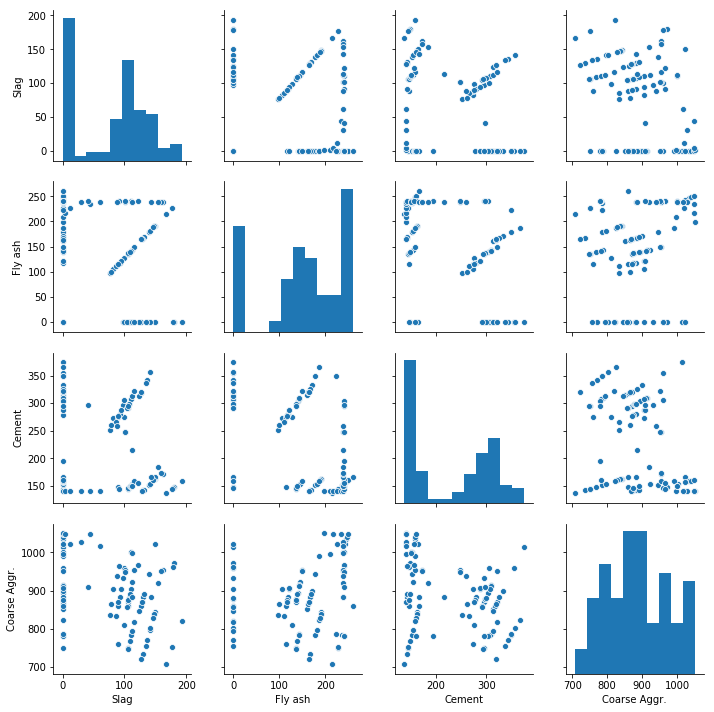

In [16]:
sns.pairplot(for_moltiple_data, vars=["Slag", "Fly ash", "Cement", "Coarse Aggr."])
plt.show() # SlagとFly ash、Cement、Coarse Aggr.との間に強いマルチコが確認された

In [17]:
df_scale_2 = df_scale.drop(["x6"], axis=1)
# 一番VIF値が高かったCoarse Aggr.を削除

In [18]:
model2 = step_aic(smf.ols, ["x1", "x2", "x3", "x4", "x5", "x7"], ["y"], data=df_scale_2)

AIC: 294.301, formula: y ~ 1
AIC: 273.641, formula: y ~ x3
AIC: 293.813, formula: y ~ x7
AIC: 296.154, formula: y ~ x5
AIC: 284.304, formula: y ~ x2
AIC: 273.489, formula: y ~ x1
AIC: 289.419, formula: y ~ x4
AIC: 146.236, formula: y ~ x1 + x3
AIC: 271.23, formula: y ~ x1 + x7
AIC: 275.477, formula: y ~ x1 + x5
AIC: 268.457, formula: y ~ x1 + x2
AIC: 257.126, formula: y ~ x1 + x4
AIC: 147.394, formula: y ~ x1 + x3 + x7
AIC: 131.627, formula: y ~ x1 + x3 + x5
AIC: 130.08, formula: y ~ x1 + x3 + x2
AIC: 116.55, formula: y ~ x1 + x3 + x4
AIC: 116.426, formula: y ~ x1 + x3 + x4 + x7
AIC: 105.19, formula: y ~ x1 + x3 + x4 + x5
AIC: 97.284, formula: y ~ x1 + x3 + x4 + x2
AIC: 83.134, formula: y ~ x1 + x3 + x4 + x2 + x7
AIC: 89.819, formula: y ~ x1 + x3 + x4 + x2 + x5
AIC: 76.703, formula: y ~ x1 + x3 + x4 + x2 + x7 + x5
The best formula: y ~ x1 + x3 + x4 + x2 + x7 + x5


In [19]:
y3 = df_scale_2["y"]
X3 = df_scale[["x1", "x3", "x4", "x2", "x7", "x5"]]

mod3 = sm.OLS(y3, sm.add_constant(X3))
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     132.7
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           3.34e-44
Time:                        17:39:07   Log-Likelihood:                -31.352
No. Observations:                 103   AIC:                             76.70
Df Residuals:                      96   BIC:                             95.15
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.033  -8.29e-15      1.0

In [20]:
num_cols2 = mod3.exog.shape[1]
vifs = [variance_inflation_factor(mod3.exog, i) for i in range(0, num_cols2)]
pd.DataFrame(vifs, index=mod3.exog_names, columns=["VIF"])

VIF
const  1.000000
x1     1.886804
x3     2.318386
x4     1.117704
x2     1.832936
x7     1.323080
x5     1.158483

In [21]:
f_X = data6[["Cement", "Fly ash", "Water", "Slag", "Fine Aggr.", "SP"]]
f_X.columns = ["x1", "x3", "x4", "x2", "x7", "x5"]
f_y = pd.DataFrame(data6["Compressive Strength (28-day)(Mpa)"])
f_y.columns=["y"]
f_df = pd.concat([f_X, f_y], axis=1)

In [22]:
#f_X = pd.DataFrame(data6[["Cement", "Fly ash", "Water", "Slag", "Fine Aggr.", "SP"]], columns=["x1", "x3", "x4", "x2", "x7", "x5"])
#f_y = pd.DataFrame(data6["Compressive Strength (28-day)(Mpa)"], columns=("y"))

f_mod = sm.OLS(f_y, sm.add_constant(f_X))
f_res = f_mod.fit()

print(f_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     132.7
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           3.34e-44
Time:                        17:39:07   Log-Likelihood:                -242.93
No. Observations:                 103   AIC:                             499.9
Df Residuals:                      96   BIC:                             518.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9469      5.377     -0.734      0.4

In [23]:
model_f = step_aic(smf.ols, ["x1", "x2", "x3", "x4", "x5", "x7"], ["y"], data=f_df)

AIC: 717.453, formula: y ~ 1
AIC: 696.793, formula: y ~ x3
AIC: 716.965, formula: y ~ x7
AIC: 719.305, formula: y ~ x5
AIC: 707.456, formula: y ~ x2
AIC: 696.64, formula: y ~ x1
AIC: 712.571, formula: y ~ x4
AIC: 569.388, formula: y ~ x1 + x3
AIC: 694.381, formula: y ~ x1 + x7
AIC: 698.629, formula: y ~ x1 + x5
AIC: 691.609, formula: y ~ x1 + x2
AIC: 680.278, formula: y ~ x1 + x4
AIC: 570.546, formula: y ~ x1 + x3 + x7
AIC: 554.779, formula: y ~ x1 + x3 + x5
AIC: 553.232, formula: y ~ x1 + x3 + x2
AIC: 539.702, formula: y ~ x1 + x3 + x4
AIC: 539.578, formula: y ~ x1 + x3 + x4 + x7
AIC: 528.342, formula: y ~ x1 + x3 + x4 + x5
AIC: 520.436, formula: y ~ x1 + x3 + x4 + x2
AIC: 506.286, formula: y ~ x1 + x3 + x4 + x2 + x7
AIC: 512.971, formula: y ~ x1 + x3 + x4 + x2 + x5
AIC: 499.855, formula: y ~ x1 + x3 + x4 + x2 + x7 + x5
The best formula: y ~ x1 + x3 + x4 + x2 + x7 + x5


In [32]:
f_res.HC0_se

const    5.394347
x1       0.004717
x3       0.004628
x4       0.018556
x2       0.005497
x7       0.005699
x5       0.082582
dtype: float64

In [34]:
f_res.HC1_se

const    5.587556
x1       0.004886
x3       0.004794
x4       0.019221
x2       0.005694
x7       0.005903
x5       0.085540
dtype: float64